## REGULARIZATION

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\Regularization\Boston.csv")

In [3]:
df.head()

Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2

In [4]:
# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace= True)

In [6]:
df.head(1)

crim    zn  indus  chas    nox     rm   age   dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.09    1  296     15.3   

   black  lstat  medv  
0  396.9   4.98  24.0

In [7]:
X = df.drop('medv' , axis = 1)
Y = df['medv']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.25, random_state= 10)

(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)



((379, 13), (379,), (127, 13), (127,))

In [9]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

lreg_y_pred = lreg.predict(X_test)

mean_squared_error = np.mean((lreg_y_pred - Y_test)**2)

print('Mean Squared Error o ntest set: ', mean_squared_error)


Mean Squared Error o ntest set:  32.44253669600662


In [10]:
reg_cof = pd.DataFrame()
reg_cof['Columns'] = X_train.columns
reg_cof['Normal_Reg_Coeff'] = pd.Series(lreg.coef_)
reg_cof

Columns  Normal_Reg_Coeff
0      crim         -0.125880
1        zn          0.057570
2     indus         -0.016418
3      chas          1.264245
4       nox        -15.388911
5        rm          3.494769
6       age          0.011489
7       dis         -1.470710
8       rad          0.292530
9       tax         -0.012213
10  ptratio         -0.841219
11    black          0.012479
12    lstat         -0.536883

<Axes: xlabel='Normal_Reg_Coeff', ylabel='Columns'>

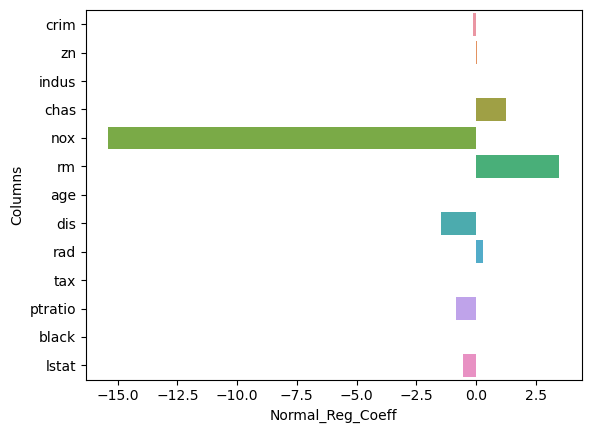

In [11]:
import seaborn as sns

sns.barplot(x = 'Normal_Reg_Coeff' , y = 'Columns' , data = reg_cof)

In [12]:
# import ridge regression from sklearn library 

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 30)
ridge.fit(X_train,Y_train)
y_pred = ridge.predict(X_test)


mean_squared_error_ridge = np.mean((y_pred - Y_test)**2)

print('Mean Squared Error o ntest set: ', mean_squared_error_ridge)
reg_cof['Ridge_reg_coef'] = pd.Series(ridge.coef_)
reg_cof



Mean Squared Error o ntest set:  35.361629008784476


Columns  Normal_Reg_Coeff  Ridge_reg_coef
0      crim         -0.125880       -0.120703
1        zn          0.057570        0.064261
2     indus         -0.016418       -0.078061
3      chas          1.264245        0.494449
4       nox        -15.388911       -0.578617
5        rm          3.494769        2.804363
6       age          0.011489        0.004636
7       dis         -1.470710       -1.240184
8       rad          0.292530        0.278256
9       tax         -0.012213       -0.014403
10  ptratio         -0.841219       -0.689358
11    black          0.012479        0.012429
12    lstat         -0.536883       -0.607542

In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1)
lasso.fit(X_train,Y_train)
y_pred_lasso = lasso.predict(X_test)


mean_squared_error_lasso = np.mean((y_pred_lasso - Y_test)**2)

print('Mean Squared Error o ntest set: ', mean_squared_error_lasso)
reg_cof['Lasso_reg_coef'] = pd.Series(lasso.coef_)
reg_cof

Mean Squared Error o ntest set:  43.29113614230587


Columns  Normal_Reg_Coeff  Ridge_reg_coef  Lasso_reg_coef
0      crim         -0.125880       -0.120703       -0.087538
1        zn          0.057570        0.064261        0.068249
2     indus         -0.016418       -0.078061       -0.023959
3      chas          1.264245        0.494449        0.000000
4       nox        -15.388911       -0.578617       -0.000000
5        rm          3.494769        2.804363        0.358193
6       age          0.011489        0.004636        0.031945
7       dis         -1.470710       -1.240184       -0.724916
8       rad          0.292530        0.278256        0.255015
9       tax         -0.012213       -0.014403       -0.015531
10  ptratio         -0.841219       -0.689358       -0.555250
11    black          0.012479        0.012429        0.009709
12    lstat         -0.536883       -0.607542       -0.765308

In [14]:
from sklearn.linear_model import ElasticNet

ElasticNet = ElasticNet()
ElasticNet.fit(X_train,Y_train)
y_pred_net = ElasticNet.predict(X_test)


mean_squared_error_net = np.mean((y_pred_net - Y_test)**2)

print('Mean Squared Error o ntest set: ', mean_squared_error_net)
reg_cof['Elasticnet_reg_coef'] = pd.Series(ElasticNet.coef_)
reg_cof

Mean Squared Error o ntest set:  41.7133040887063


Columns  Normal_Reg_Coeff  Ridge_reg_coef  Lasso_reg_coef  \
0      crim         -0.125880       -0.120703       -0.087538   
1        zn          0.057570        0.064261        0.068249   
2     indus         -0.016418       -0.078061       -0.023959   
3      chas          1.264245        0.494449        0.000000   
4       nox        -15.388911       -0.578617       -0.000000   
5        rm          3.494769        2.804363        0.358193   
6       age          0.011489        0.004636        0.031945   
7       dis         -1.470710       -1.240184       -0.724916   
8       rad          0.292530        0.278256        0.255015   
9       tax         -0.012213       -0.014403       -0.015531   
10  ptratio         -0.841219       -0.689358       -0.555250   
11    black          0.012479        0.012429        0.009709   
12    lstat         -0.536883       -0.607542       -0.765308   

    Elasticnet_reg_coef  
0             -0.101268  
1              0.067342  
2             -0.048290  
3              0.000000  
4             -0.000000  
5              0.733541  
6              0.030114  
7             -0.792589  
8              0.278758  
9             -0.015767  
10            -0.596275  
11             0.010182  
12            -0.736156